<a href="https://colab.research.google.com/github/Shawn1303/Artificial-Intelligence/blob/main/Hw2/assignment_mean_connect4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Search: Playing "Mean" Connect 4


## Instructions

All student names in group: Shawn Zhu, Benson Chen

I understand that my submission needs to be my own group's work: SZ, BC

I understand that ChatGPT / Copilot / other AI tools are not allowed: SZ, BC

Points: 10

Complete this notebook and submit it (save/print as pdf). The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play "Mean" Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

> **The mean part:** This game has an additional rule. Every time it is a player's turn, the player can decide to instead of playing a new disk, take a bottom row disk of the opponent and place it back in the top of the same column. All disks above the removed disk will fall down one position and the removed one will be placed on top. Note that a player can only move an _opponent's disc_ that is in the _bottom row_ of the board. **Further, you are not allowed to play a mean move if your opponent just played one.** This ensures the game will end at some point. This also may affect the definition of a state, compared with standard Connect 4.

If a mean move causes both players to win, the game immediately ends and it is a tie, even if one player has more connect-4s than the other one. If a mean move causes one player to win, then the game also ends and the player with the connect-4 is the winner.

Note that normal [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

In [ ]:
# Your code/answer goes here.
'''
Initial State = m x n grid all empty or with some cell already containing a
colored disc. State keeps track if a mean move has been played.

Actions: drop a colored disc corresponding to the player down the nth column or
the mean move where you take a bottom row disk of the opponent and place it back
in the top of the same column. Mean move cannot be used if previous player used
it.

Transition model: Apply an action and on the grid array, all the values on that
column is updated to either 1 or -1 to match the positions of the colored discs.
If only dropping a colored disc, only the top most value in that column that is
0 will be updated to 1 or -1. If a disc was removed from the bottom and placed
on top, then the whole column is updated according to the colored discs positions
since all the discs above the removed disc will sink down. Returns the state of
the grid after dropping or removing a colored disc and keep track of if action
is a mean move.

Test for the terminal state: Check if there is a horizontal, vertical, or
diagonal line of four of one's own discs by either counting the whole grid or
count from where the dropped disc is if the move applied isn't a mean move.
Check if grid is full, then it is a tie.

Utility for terminal states: return board 1.5 * rows * col - moves
'''

How big is the state space? Give an estimate and explain it.

In [ ]:
# Your code/ answer goes here.
'''
State Space = 2^(m * n + 1)

The grid is m rows by n columns. There is 2 possible colored discs at each cell.
So there is 2^(m * n) possible states for which the colored discs can be in the
grid cells. We want to multiply that by 2 because we want to keep track of
whether the move applied is a mean move or a normal move due to the additional
rule.
'''

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
# Your code/ answer goes here.
'''
One node has a max branch factor of 2n because you can choose to either drop a
colored disc at the nth column or remove the other player's colored disc and
drop it in the same column. The game tree can have a max depth of 2 * m * n
because to fill up the whole grid, the total moves needed is m * n. If any mean
move were made, it doesn't increase the total number of discs in the grid and
you can't make a consecutive mean move, so the maximum number of moves that can
be made is 2 * m * n. The tree would have a max depth of 2 * m * n with a max
branch factor of 2n.
'''

## Task 2: Game Environment and Random Agent [3 point]

You can use a numpy character array as the board. Note that the following function can create boards of different sizes.

In [5]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


Instead of colors (red and yellow), you can use 1 and -1 to represent the players Max and Min. Make sure that your agent functions all have the from: `agent_type(state, player = 1)`, where board is the current board position and player is the player (1, -1) whose next move it is and who the agent should play.

Visualization code by Randolph Rankin:

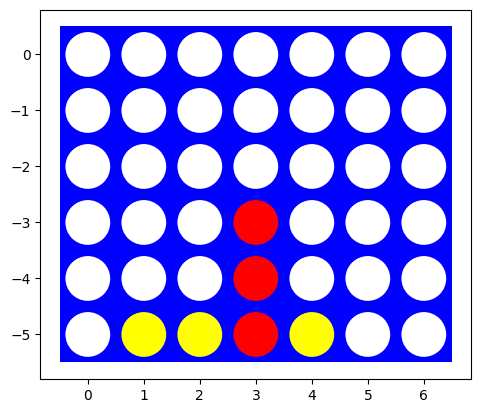

In [4]:
import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

visualize(board)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [230]:
# Your code/ answer goes here.
# s = state that has (board:[][], mean:Bool, move:Tuple(x,y), countMoves)
# mean is boolean, True if mean move played or else False
# Move is a tuple (x,y) of last move played

# action a = (mean:Bool, move:Tuple(x,y), player:(1,-1))

import copy

def result(s, a):
  # state = (s[0].copy(), s[1],)
  board = copy.deepcopy(s[0])
  move = a[1]
  player = a[2]
  if a[0]:
    # move bottom disc to top and move all discs down
    row = move[0]
    col = move[1]
    temp = board[row][col]
    row -= 1
    curr = board[row][col]
    while curr != 0 and row >= 0:
      board[row + 1][col] = curr
      row -= 1
      curr = board[row][col]
    board[row + 1][col] = temp
    move = (row + 1, col)

  else:
    # set disc to top of col
    board[move[0]][move[1]] = player

  return (board, a[0], move, s[3] + 1)

def terminal(s):
  if s[2] is None:
    return False
  # s.mean
  move = s[2]
  board = s[0]
  if s[1]:
    # if mean move, apply checkConnect4 to all elements in that col
    # s.move
    row = move[0]
    col = move[1]
    # s.board
    while row <= len(board)-1:
      if checkConnect4(row, col, s):
        return True
      row += 1
    # if all filled, return True
    # return np.all(board != 0)
    return all(all(val != 0 for val in row) for row in board)

  # if !checkConnect4(move[0], move[1], s):
  #   return np.all(board != 0)

  return checkConnect4(move[0], move[1], s)

def checkConnect4(x, y, s):
  # check vertical, horizontal and diagonal
  board = s[0]
  row = x + 1
  col = y
  # checks vertical downward if four in a col
  count = 1
  while row <= len(board)-1:
    if board[row][col] == board[x][y]:
      count += 1
      row += 1
      if count == 4:
        return True
    else:
      break;
# -----------------------------------------------------------------------------
  # checks diagonally left down
  row = x + 1
  col -= 1
  count = 1
  while row <= len(board)-1 and col >= 0:
    if board[row][col] == board[x][y]:
      count += 1
      row += 1
      col -= 1
      if count == 4:
        return True
    else:
      break;
  # checks diagonally right up, keep same count
  row = x - 1
  col = y + 1
  while row >= 0 and col <= len(board[0])-1:
    if board[row][col] == board[x][y]:
      count += 1
      row -= 1
      col += 1
      if count == 4:
        return True
    else:
      break;
  # checks diagonally right down
  row = x + 1
  col = y + 1
  count = 1
  while row <= len(board)-1 and col <= len(board[0])-1:
    if board[row][col] == board[x][y]:
      count += 1
      row += 1
      col += 1
      if count == 4:
        return True
    else:
      break;
  # checks diagonally left up, keep same count
  row = x - 1
  col = y - 1
  while row >= 0 and col >= 0:
    if board[row][col] == board[x][y]:
      count += 1
      row -= 1
      col -= 1
      if count == 4:
        return True
    else:
      break;
# -----------------------------------------------------------------------
  # check horizontally left
  row = x
  col = y - 1
  count = 1
  while col >= 0:
    if board[row][col] == board[x][y]:
      count += 1
      col -= 1
      if count == 4:
        return True
    else:
      break;

  col = y + 1
  # check horizontally right
  while col <= len(board[0])-1:
    if board[row][col] == board[x][y]:
      count += 1
      col += 1
      if count == 4:
        return True
    else:
      break;

  return False

def actions(s):
    board = s[0]
    move = s[2]
    if move is None:
      player = 1
    elif s[1]:
      player = board[move[0]][move[1]]
    else:
      player = -board[move[0]][move[1]]
    actionsList = []

    for j, col in enumerate(board[0]):
      row = len(board)-1
      while board[row][j] != 0 and row >= 0:
        row -= 1
      if row >= 0:
        actionsList.append((False, (row, j), player))

    # if last move isn't mean move
    if not s[1]:
      for j, col in enumerate(board[len(board)-1]):
        if col == -player:
          actionsList.append((True, (len(board)-1, j), player))

    return actionsList

def utility(s):
  board = s[0]
  # total_moves = sum(1 for row in board for element in row if element != 0)
  total_moves = s[3]
  d = len(board) * len(board[0])
  move = s[2]

  # visualize(s[0])

  # if mean move applied
  winner = None
  if s[1]:
    row = move[0]
    col = move[1]
    while row <= len(board)-1:
      if checkConnect4(row, col, s):
        if winner is None:
          # print(move)
          # print(f'row:{row}, col:{col}')
          winner = board[row][col]
        if board[row][col] != winner:
          return 0
      row += 1
    # if tie
    if winner is None and all(all(val != 0 for val in row) for row in board):
      return 0
  else:
  # if winner is None and checkConnect4(move[0], move[1], s):
  #   winner = board[move[0]][move[1]]
  # else:
  #   return 0
    if checkConnect4(move[0], move[1], s):
      winner = board[move[0]][move[1]]
    else:
      return 0
  # return positive of first player won
  # else return negative
  if winner == 1:
    return 1.5 * d - total_moves
  else:
    return -(1.5 * d - total_moves)


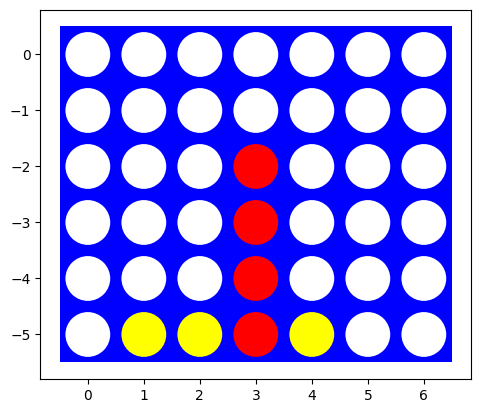

57.0


In [178]:
# board = [[1, -1, 1, 1, 1, -1, 1],
#          [-1, 1, 1, -1, 1, 1, -1],
#          [1, -1, -1, 1, -1, -1, 1],
#          [-1, 1, 1, -1, -1, 1, -1],
#          [1, -1, -1, 1, 1, -1, 1],
#          [-1,-1,1, -1,-1, 1, 1]]
# visualize(board)
# s = (board, True, (0,3))
# print(terminal(s))
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, -1, 0, 0, 0],
         [0, 0, 0, 1, -1, 0, 0],
         [0, 0, 1, 1, 1, -1, 0],
         [0,-1,-1, 1,-1, 1, -1]]

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)
s = (board, False, (2,3), 6)
# print(actions(s))
# for a in actions(s):
#   visualize(result(s, a)[0])
print(utility(s))


Implement an agent that plays randomly. Make sure the agent function receives as the percept the game state and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(state, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [114]:
# Your code/ answer goes here.
import random
def random_player(s, player = None):
  return random.choice(actions(s))

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

> {'red': 548, 'yellow': 418, 'tie': 34} is one of the results I got. After many runs, red wins more than yellow. I'd expect red to win more because the one who moves first has an advantage.

In [116]:
# Your code/ answer goes here.
def switch_player(player, red, yellow):
    if player == 1:
        return -1, yellow
    else:
        return 1, red

def play(red, yellow, N = 1000, board):
    results = {'red': 0, 'yellow': 0, 'tie': 0}

    for i in range(N):
        # board = [[0, 0, 0, 0, 0, 0, 0],
        #  [0, 0, 0, 0, 0, 0, 0],
        #  [0, 0, 0, 0, 0, 0, 0],
        #  [0, 0, 0, 0, 0, 0, 0],
        #  [0, 0, 0, 0, 0, 0, 0],
        #  [0, 0, 0, 0, 0, 0, 0]]

        # board = [
        # [0,0,0,0],
        # [-1,0,0,0],
        # [1,1,0,1],
        # [1,-1,0,-1]
        # ]

        player, fun = 1, red
        s = (board, False, None)
        # visualize(board)

        while True:
            a = fun(s, player)
            s = result(s, a)
            # visualize(s[0])

            terminate = terminal(s)
            if terminate:
                score = utility(s)
                if score == 0:
                  results['tie'] += 1
                elif score > 0:
                  results['red'] += 1
                else:
                  results['yellow'] += 1
                break

            player, fun = switch_player(player, red, yellow)

    return results

display(play(random_player, random_player, N=1000, [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]]))

{'red': 564, 'yellow': 409, 'tie': 27}

## Task 3: Minimax Search with Alpha-Beta Pruning [3 points]

### Implement the search starting.

Implement the search starting from a given state and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [232]:
# Your code/ answer goes here.
import math

def alpha_beta_search(s, player):
  if player == 1:
    value, action = max_value(s, player, -math.inf, +math.inf)
  else:
    value, action = min_value(s, player, -math.inf, +math.inf)

  return action

def max_value(s, player, alpha, beta):
  # print(s)
  if terminal(s):
    # print(s)
    # print(f'max: {utility(s)}')
    return utility(s), None

  v, action = -math.inf, None

  # print(f'max: {actions(s)}')
  for a in actions(s):
    # a = (mean:Bool, move:Tuple(x,y), player:(1,-1))
    # print(f'max: {alpha}')
    # print(f'max: {beta}')
    # print(f'action: {a}')
    # visualize(result(s,a)[0])
    v2, a2 = min_value(result(s, a), -player, alpha, beta)
    # print(result(s,a))
    # visualize(result(s,a)[0])

    if v2 > v:
      v, action = v2, a
      alpha = max(alpha, v)

    if v >= beta:
      return v, action

  return v, action

def min_value(s, player, alpha, beta):
  # print(s)
  if terminal(s):
    # print(s)
    # print(f'min: {utility(s)}')
    return utility(s), None

  v, action = +math.inf, None

  # print(f'min: {actions(s)}')
  for a in actions(s):
    # a = (mean:Bool, move:Tuple(x,y), player:(1,-1))
    # print(f'min: {alpha}')
    # print(f'min: {beta}')
    # print(f'action: {a}')
    # visualize(result(s,a)[0])
    v2, a2 = max_value(result(s, a), -player, alpha, beta)
    # visualize(result(s,a)[0])

    if v2 < v:
      v, action = v2, a
      beta = max(beta, v)

    if v <= alpha:
      return v, action

  return v, action


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

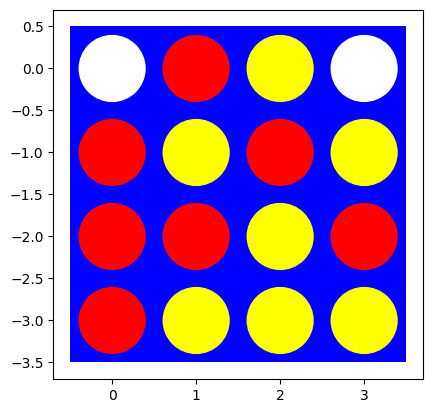

(False, (0, 0), 1)


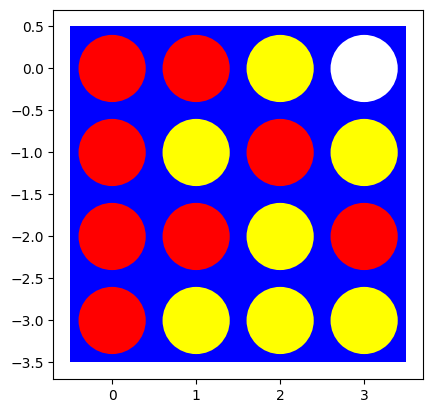

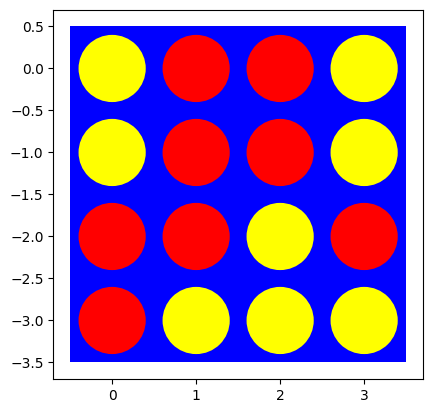

(True, (3, 2), 1)


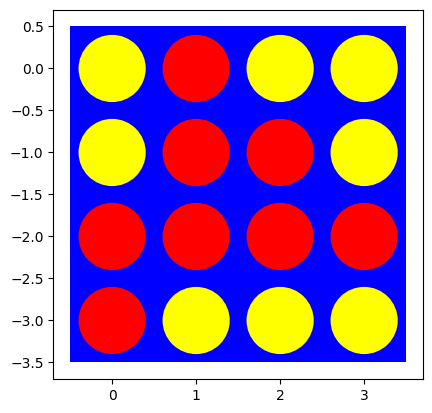

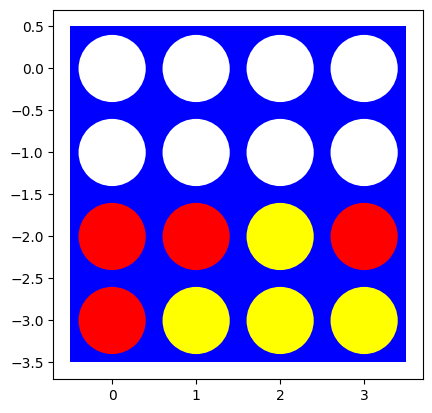

(False, (1, 2), 1)


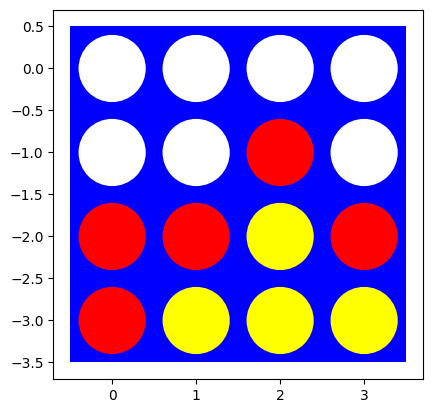

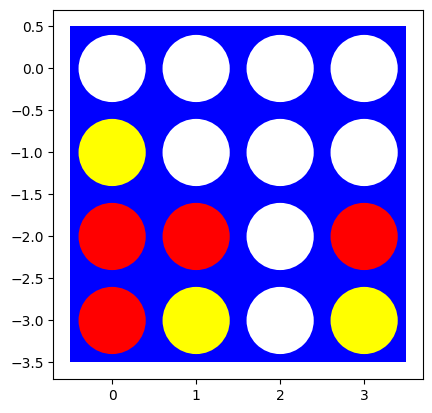

(True, (3, 0), -1)


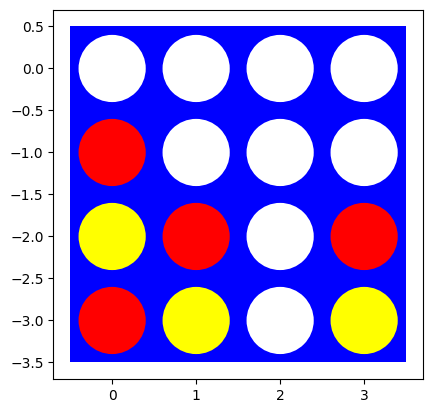

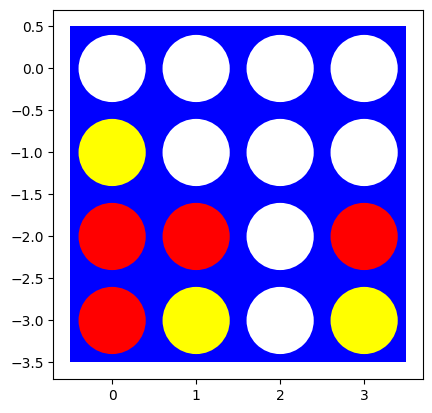

(False, (0, 0), -1)


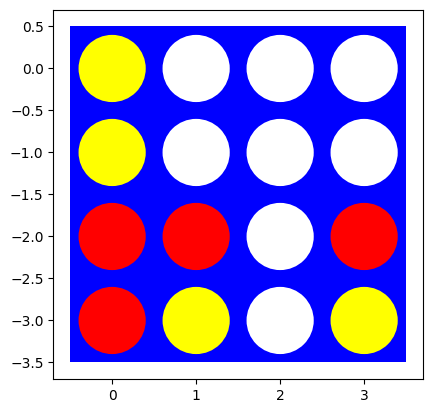

In [234]:
# Your code/ answer goes here.
# 1
board = [
    [0,1,-1,0],
    [1,-1,1,-1],
    [1,1,-1,1],
    [1,-1,-1,-1]
]
visualize(board)
s = (board, False, (0,2), 14)
a = alpha_beta_search(s, 1)
print(a)
visualize(result(s, a)[0])
# 2
board = [
    [-1,1,1,-1],
    [-1,1,1,-1],
    [1,1,-1,1],
    [1,-1,-1,-1]
]
visualize(board)
s = (board, False, (0,0), 16)
a = alpha_beta_search(s, 1)
print(a)
visualize(result(s, a)[0])
# 3
board = [
    [0,0,0,0],
    [0,0,0,0],
    [1,1,-1,1],
    [1,-1,-1,-1]
]
visualize(board)
s = (board, False, (2,2), 8)
a = alpha_beta_search(s, 1)
print(a)
visualize(result(s, a)[0])

# 4
board = [
    [0,0,0,0],
    [-1,0,0,0],
    [1,1,0,1],
    [1,-1,0,-1]
]
visualize(board)
s = (board, False, (2,3), 7)
a = alpha_beta_search(s, -1)
print(a)
visualize(result(s, a)[0])
# 5
board = [
    [0,0,0,0],
    [-1,0,0,0],
    [1,1,0,1],
    [1,-1,0,-1]
]
visualize(board)
s = (board, True, (1,0), 7)
a = alpha_beta_search(s, -1)
print(a)
visualize(result(s, a)[0])

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

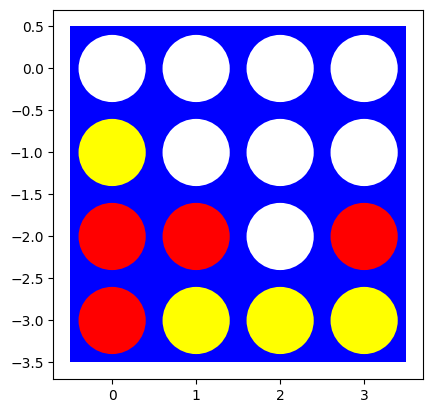

(False, (2, 2), 1)


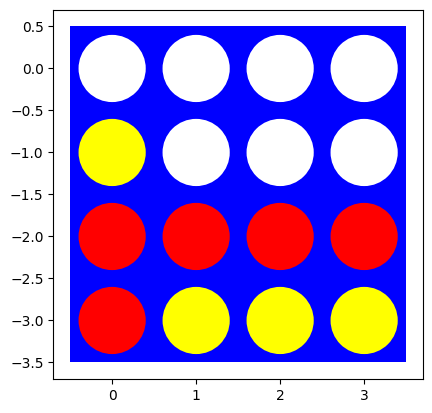

In [255]:
# Your code/ answer goes here.
board = [
    [0,0,0,0],
    [-1,0,0,0],
    [1,1,0,1],
    [1,-1,-1,-1]
]
visualize(board)
s = (board, False, (1,0), 8)
a = alpha_beta_search(s, 1)
print(a)
visualize(result(s, a)[0])

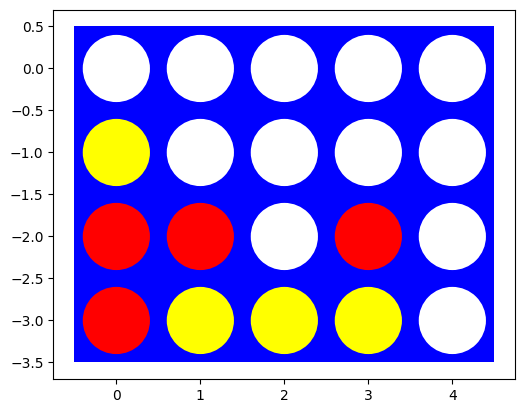

KeyboardInterrupt: 

In [256]:
board = [
    [0,0,0,0,0],
    [-1,0,0,0,0],
    [1,1,0,1,0],
    [1,-1,-1,-1,0]
]
visualize(board)
s = (board, False, (1,0), 8)
a = alpha_beta_search(s, 1)
print(a)
visualize(result(s, a)[0])

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move.

In [249]:
# Your code/ answer goes here.
# Choose the move that puts a disc near most of its own discs
# check how many discs are surrounding the placed discs
# in the case of mean move, check down the column and count number of discs closer
def move_ordering(s, actions):
  d = {}
  for a in actions:
    state = result(s,a)
    board = state[0]
    move = state[2]
    r = move[0]
    c = move[1]
    val = board[r][c]
    count = 0
    if c > 0:
      # left
      if board[r][c - 1] == val:
        count += 1

      if r > 0:
        # left up
        if board[r - 1][c - 1] == val:
          count += 1
        # up
        if board[r - 1][c] == val:
          count += 1

      if r < len(board)-1:
        # left down
        if board[r + 1][c - 1] == val:
          count += 1
        # down
        if board[r + 1][c] == val:
          count += 1
    if c < len(board[0]) - 1:
      # right
      if board[r][c + 1] == val:
          count += 1

      if r > 0:
        # right up
        if board[r - 1][c + 1] == val:
          count += 1
      if r < len(board)-1:
        # right down
        if board[r + 1][c + 1] == val:
          count += 1

    d[a] = count

  return sorted(d, key=lambda x: d[x])

def alpha_beta_search_move_ordering(s, player):
  if player == 1:
    value, action = max_value(s, player, -math.inf, +math.inf)
  else:
    value, action = min_value(s, player, -math.inf, +math.inf)

  return action

def max_value_move_ordering(s, player, alpha, beta):

  if terminal(s):
    return utility(s), None

  v, action = -math.inf, None

  # for a in actions(s):
  ac = actions(s)
  for a in move_ordering(s, ac):
    v2, a2 = min_value(result(s, a), -player, alpha, beta)

    if v2 > v:
      v, action = v2, a
      alpha = max(alpha, v)

    if v >= beta:
      return v, action

  return v, action

def min_value_move_ordering(s, player, alpha, beta):

  if terminal(s):
    return utility(s), None

  v, action = +math.inf, None

  # for a in actions(s):
  ac = actions(s)
  for a in move_ordering(s, ac):
    v2, a2 = max_value(result(s, a), -player, alpha, beta)

    if v2 < v:
      v, action = v2, a
      beta = max(beta, v)

    if v <= alpha:
      return v, action

  return v, action


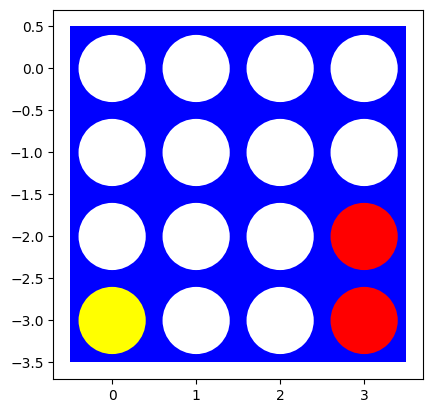

(False, (2, 0), 1)


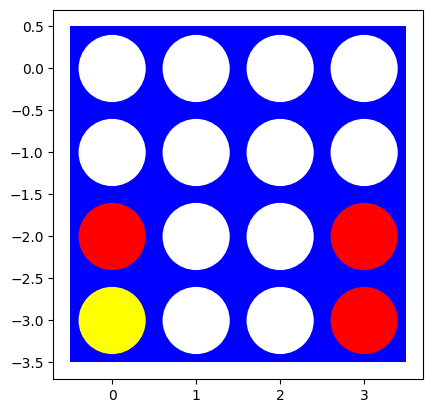

In [262]:
board = [
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,1],
    [-1,0,0,1]
]
visualize(board)
s = (board, False, (3,0), 4)
a = alpha_beta_search(s, 1)
print(a)
visualize(result(s, a)[0])

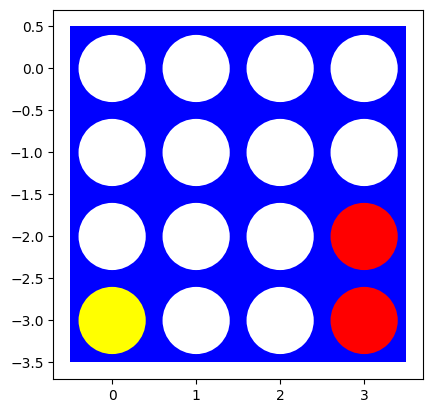

(False, (2, 0), 1)


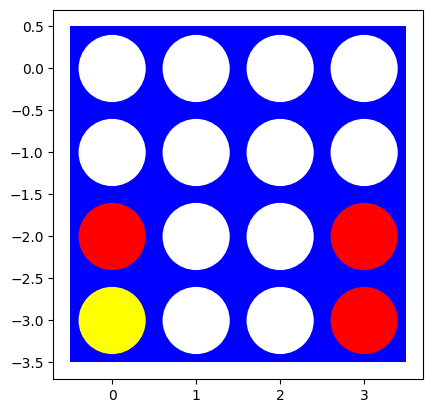

In [263]:
board = [
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,1],
    [-1,0,0,1]
]
visualize(board)
s = (board, False, (3,0), 4)
a = alpha_beta_search_move_ordering(s, 1)
print(a)
visualize(result(s, a)[0])

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.
'''
Play some first moves that just seems optimized. I would say putting a disc in
the middle as a first move can be every advantageous. Play moves that would
connect more of your own disc for around 10 moves or less depending on the board.
After that, start using minimax search with alpha-beta pruning to determine the
rest of your moves.
'''

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.
display(play(alpha_beta_search, random_player, n = 100, [
        [0,0,0,0],
        [-1,0,0,0],
        [1,1,0,1],
        [1,-1,0,-1]
        ]))

## Task 4: Heuristic Alpha-Beta Tree Search [3 points]

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [ ]:
# Your code/ answer goes here.

### Cutting off search

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
